<a href="https://colab.research.google.com/github/Imama-Kainat/DataPreprocessing_Daibtes-dataset/blob/main/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


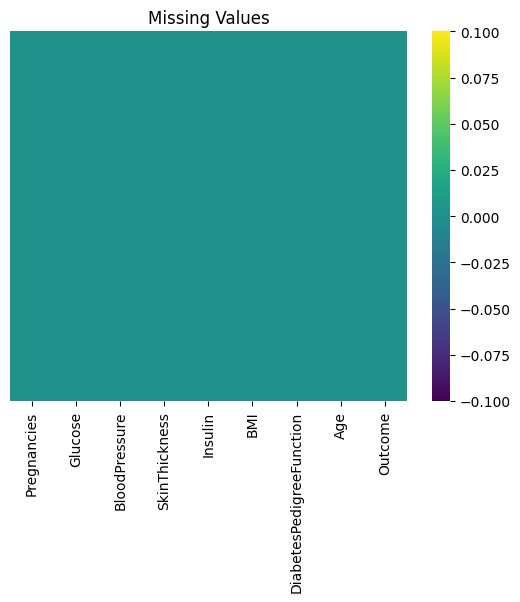

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.impute import SimpleImputer

def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

# Load dataset (you can replace 'your_dataset.csv' with your actual dataset)
data = pd.read_csv('diabetes.csv')

# Handle missing values
print(data.isnull().sum())
data = data.fillna(data.mean())

# Visualize missing values
sns.heatmap(data.isnull(), yticklabels=False, cbar=True, cmap='viridis')
plt.title("Missing Values")
plt.show()

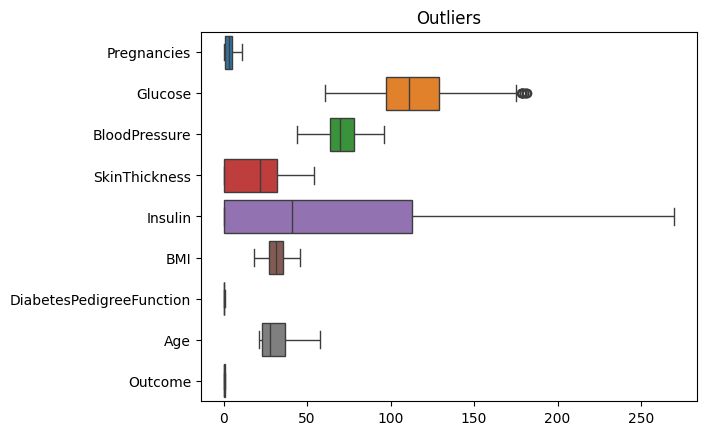

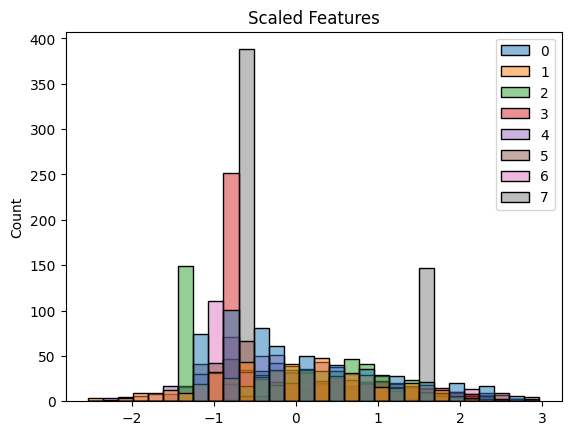

Number of samples in training set: 428
Number of samples in testing set: 107
Number of features: 8


In [ ]:
def IQR(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return IQR

IQR = IQR(data)
data = data[~((data < (data.mean() - 1.5 * IQR)) | (data > (data.mean() + 1.5 * IQR))).any(axis=1)]

# Visualize outliers
sns.boxplot(data=data, orient='h')
plt.title("Outliers")
plt.show()
# Normalize or scale features
scaler = StandardScaler()
X = data.drop('Glucose', axis=1)  # Replace 'target_column_name' with the actual name of the target column
y = data['Glucose']
X_scaled = scaler.fit_transform(X)

# Visualize scaling
sns.histplot(data=pd.DataFrame(X_scaled), kde=False)
plt.title("Scaled Features")
plt.show()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Display some information
print("Number of samples in training set:", X_train.shape[0])
print("Number of samples in testing set:", X_test.shape[0])
print("Number of features:", X_train.shape[1])


Number of features: 8
